# Comparison

In this notebook we compare our Genetic Algorithm with the Bayesian Optimization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from retrievement import *

import wandb
api = wandb.Api()

In [3]:
runs_GA = api.runs(path, filters=Filter.MLP_SINEWAVE)
runs_GA = list(runs_GA)
df_GA = dict()
for run in runs_GA:
    df_GA = get_metrics(df_GA, run, int(run.name.split('-')[1]))
df_GA = pd.DataFrame.from_dict(df_GA, orient='index')

In [4]:
runs_BO = api.runs(path, filters=Filter.MLP_SINEWAVE_BO)    
runs_BO = list(runs_BO)
df_BO = dict()
for run in runs_BO:
    df_BO = get_metrics(df_BO, run, int(run.name.split('-')[-1]))
df_BO = pd.DataFrame.from_dict(df_BO, orient='index')

### Hyperparameters evolution

In [5]:
cols = ['n_layers', 'hidden_size', 'dropout']
mean_GA, std_GA, best_values_GA = plot_metrics_evolution(
    df = df_GA,
    cols = cols,
)
best_GA = df_GA[df_GA['val_mse'] == df_GA['val_mse'].min()]
mean_BO, std_BO, best_values_BO = plot_metrics_evolution(
    df = df_BO,
    cols = cols,
)
best_BO = df_BO[df_BO['val_mse'] == df_BO['val_mse'].min()]

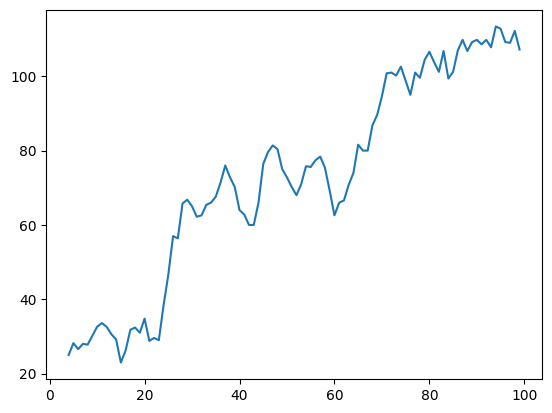

In [20]:
plt.plot(
    np.arange(100),
    df_GA.hidden_size.rolling(5).mean()
)

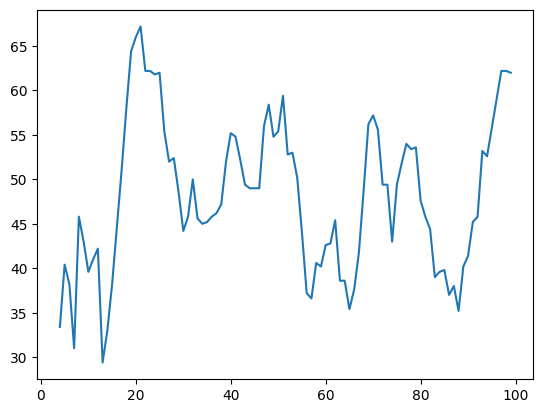

In [21]:
plt.plot(
    np.arange(100),
    df_BO.hidden_size.rolling(5).mean()
)